In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import re
import numpy as np
from PIL import Image
import pickle
pkl = open('../images/shinchan.pkl', 'rb')
im = pickle.load(pkl)
im = im.replace(' ',"") 
im = im.replace('[',"")
im = im.replace(']',"")
im = im.replace('{',"")
im = im.replace('}',"")
im = im.replace('(',"")
im = im.replace(')',"")

In [3]:
im = np.fromstring(im,dtype=int,sep=',')

In [4]:
im = np.reshape(im,(648,1152,4))

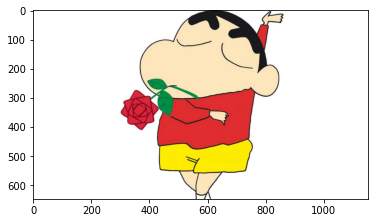

In [5]:
plt.imshow(im)

In [6]:
class node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
        self.direction = ''

In [7]:

def printNodes(node, val=''):
    newVal = val + str(node.direction)
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")
        ans[node.symbol]=newVal

In [8]:
img = im[:,:,0]
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i][j]]+=1
freq={}
for i in range(256):
    freq[i]=int(hist[i])
freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
ans= {}
chars = np.arange(0,256)
freq = hist
nodes = []
for x in range(len(chars)):
    nodes.append(node(freq[x], chars[x]))
 
while len(nodes) > 1:
    nodes = sorted(nodes, key=lambda x: x.freq)
    left = nodes[0]
    right = nodes[1]
    left.direction = 0
    right.direction = 1
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
    nodes.remove(left)
    nodes.remove(right)
    nodes.append(newNode)
 
printNodes(nodes[0])

25 -> 000000
4 -> 000001000
68 -> 000001001000
84 -> 000001001001
179 -> 00000100101
241 -> 0000010011
16 -> 0000010100
18 -> 0000010101
93 -> 000001011000
105 -> 000001011001
195 -> 00000101101
15 -> 0000010111
220 -> 00000110
139 -> 00000111000
136 -> 00000111001
10 -> 0000011101
172 -> 00000111100
38 -> 00000111101
189 -> 00000111110
190 -> 00000111111
248 -> 0000100
214 -> 00001010
193 -> 00001011000
103 -> 000010110010
78 -> 000010110011
178 -> 00001011010
196 -> 00001011011
180 -> 00001011100
99 -> 000010111010
83 -> 000010111011
37 -> 00001011110
111 -> 000010111110
114 -> 000010111111
27 -> 00001100
36 -> 00001101000
138 -> 00001101001
234 -> 00001101010
100 -> 000011010110
79 -> 000011010111
30 -> 0000110110
80 -> 000011011100
104 -> 000011011101
159 -> 00001101111
206 -> 0000111000
194 -> 00001110010
122 -> 000011100110
69 -> 000011100111
14 -> 0000111010
229 -> 0000111011
246 -> 00001111
109 -> 000100000000
115 -> 000100000001
155 -> 00010000001
12 -> 0001000001
13 -> 000100

In [9]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j]=ans[img[i][j]]
im[:,:,0]=img
len(im[:,:,0])

648

In [10]:
img = im[:,:,1]
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i][j]]+=1
freq={}
for i in range(256):
    freq[i]=int(hist[i])
freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
ans= {}
chars = np.arange(0,256)
freq = hist
nodes = []
for x in range(len(chars)):
    nodes.append(node(freq[x], chars[x]))
 
while len(nodes) > 1:
    nodes = sorted(nodes, key=lambda x: x.freq)
    left = nodes[0]
    right = nodes[1]
    left.direction = 0
    right.direction = 1
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
    nodes.remove(left)
    nodes.remove(right)
    nodes.append(newNode)
 
printNodes(nodes[0])

32 -> 0000000000
7 -> 0000000001
71 -> 000000001000
113 -> 000000001001
200 -> 000000001010
203 -> 000000001011
12 -> 0000000011
225 -> 000000010
10 -> 0000000110
199 -> 000000011100
68 -> 000000011101
121 -> 00000001111
111 -> 000000100000
64 -> 000000100001
58 -> 00000010001
240 -> 0000001001
39 -> 000000101
233 -> 00000011
228 -> 000001
49 -> 000010000
70 -> 000010001000
188 -> 000010001001
204 -> 000010001010
217 -> 000010001011
207 -> 000010001100
94 -> 0000100011010
80 -> 0000100011011
74 -> 000010001110
208 -> 000010001111
146 -> 000010010
36 -> 0000100110
31 -> 0000100111
27 -> 0000101
165 -> 0000110000000
176 -> 0000110000001
114 -> 000011000001
196 -> 000011000010
198 -> 000011000011
147 -> 0000110001
145 -> 000011001
239 -> 0000110100
213 -> 000011010100
151 -> 000011010101
190 -> 0000110101100
164 -> 0000110101101
116 -> 000011010111
13 -> 0000110110
222 -> 00001101110
205 -> 000011011110
215 -> 000011011111
3 -> 0000111000
30 -> 0000111001
246 -> 0000111010
109 -> 00001110

In [11]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j]=ans[img[i][j]]
im[:,:,1]=img
len(im[:,:,1])

648

In [12]:
img = im[:,:,2]
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i][j]]+=1
freq={}
for i in range(256):
    freq[i]=int(hist[i])
freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
ans= {}
chars = np.arange(0,256)
freq = hist
nodes = []
for x in range(len(chars)):
    nodes.append(node(freq[x], chars[x]))
 
while len(nodes) > 1:
    nodes = sorted(nodes, key=lambda x: x.freq)
    left = nodes[0]
    right = nodes[1]
    left.direction = 0
    right.direction = 1
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
    nodes.remove(left)
    nodes.remove(right)
    nodes.append(newNode)
 
printNodes(nodes[0])

30 -> 000000
59 -> 00000100
13 -> 0000010100
172 -> 000001010100
208 -> 000001010101
216 -> 0000010101100
223 -> 0000010101101
207 -> 000001010111
62 -> 000001011
192 -> 000001100
9 -> 0000011010
75 -> 00000110110
199 -> 00000110111
70 -> 000001110
7 -> 0000011110
12 -> 0000011111
34 -> 000010000
35 -> 000010001
248 -> 000010010
213 -> 0000100110000
215 -> 0000100110001
206 -> 000010011001
224 -> 0000100110100
144 -> 0000100110101
205 -> 000010011011
14 -> 0000100111
184 -> 00001010
8 -> 0000101100
195 -> 0000101101
72 -> 000010111
10 -> 0000110000
98 -> 0000110001000
110 -> 0000110001001
231 -> 0000110001010
219 -> 00001100010110
226 -> 00001100010111
243 -> 00001100011
11 -> 0000110010
15 -> 0000110011
28 -> 00001101
31 -> 0000111
17 -> 0001000000
77 -> 000100000100
94 -> 0001000001010
234 -> 0001000001011
244 -> 00010000011
26 -> 000100001
45 -> 00010001
6 -> 0001001000
85 -> 0001001001000
232 -> 0001001001001
173 -> 000100100101
240 -> 000100100110
76 -> 000100100111
65 -> 00010010

In [13]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j]=ans[img[i][j]]
im[:,:,2]=img
len(im[:,:,2])

648

In [14]:
img = im[:,:,3]
hist = np.zeros(256)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hist[img[i][j]]+=1
freq={}
for i in range(256):
    freq[i]=int(hist[i])
freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)
ans= {}
chars = np.arange(0,256)
freq = hist
nodes = []
for x in range(len(chars)):
    nodes.append(node(freq[x], chars[x]))
 
while len(nodes) > 1:
    nodes = sorted(nodes, key=lambda x: x.freq)
    left = nodes[0]
    right = nodes[1]
    left.direction = 0
    right.direction = 1
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
    nodes.remove(left)
    nodes.remove(right)
    nodes.append(newNode)
 
printNodes(nodes[0])

254 -> 00000000
0 -> 000000010
1 -> 000000011
2 -> 000000100
3 -> 000000101
4 -> 000000110
5 -> 000000111
6 -> 000001000
7 -> 000001001
8 -> 000001010
9 -> 000001011
10 -> 000001100
11 -> 000001101
12 -> 000001110
13 -> 000001111
14 -> 000010000
15 -> 000010001
16 -> 000010010
17 -> 000010011
18 -> 000010100
19 -> 000010101
20 -> 000010110
21 -> 000010111
22 -> 000011000
23 -> 000011001
24 -> 000011010
25 -> 000011011
26 -> 000011100
27 -> 000011101
28 -> 000011110
29 -> 000011111
30 -> 000100000
31 -> 000100001
32 -> 000100010
33 -> 000100011
34 -> 000100100
35 -> 000100101
36 -> 000100110
37 -> 000100111
38 -> 000101000
39 -> 000101001
40 -> 000101010
41 -> 000101011
42 -> 000101100
43 -> 000101101
44 -> 000101110
45 -> 000101111
46 -> 000110000
47 -> 000110001
48 -> 000110010
49 -> 000110011
50 -> 000110100
51 -> 000110101
52 -> 000110110
53 -> 000110111
54 -> 000111000
55 -> 000111001
56 -> 000111010
57 -> 000111011
58 -> 000111100
59 -> 000111101
60 -> 000111110
61 -> 000111111
62

In [15]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j]=ans[img[i][j]]
im[:,:,3]=img
len(im[:,:,3])

648